<a href="https://colab.research.google.com/github/thomwolf/tcot/blob/main/morph%20GanStyle2%20between%20two%20photos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [ ]:
NETWORK = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"

In [ ]:
STEPS = 150

In [ ]:
FPS = 30

In [ ]:
FREEZE_STEPS = 30

In [ ]:
import os
from google.colab import files

uploaded = files.upload()

if len(uploaded) != 1:
  print("Upload exactly 1 file for source.")
else:
  for k, v in uploaded.items():
    _, ext = os.path.splitext(k)
    os.remove(k)
    SOURCE_NAME = f"source{ext}"
    open(SOURCE_NAME, 'wb').write(v)

Saving face_0.jpg to face_0.jpg
Saving face_1.jpg to face_1.jpg
Saving face_2.jpg to face_2.jpg
Saving face_3.jpg to face_3.jpg
Saving face_4.jpg to face_4.jpg
Saving face_5.jpg to face_5.jpg
Saving face_6.jpg to face_6.jpg
Saving face_7.jpg to face_7.jpg
Saving face_8.jpg to face_8.jpg
Saving face_9.jpg to face_9.jpg
Saving face_10.jpg to face_10.jpg
Saving face_11.jpg to face_11.jpg
Saving face_12.jpg to face_12.jpg
Saving face_13.jpg to face_13.jpg
Saving face_14.jpg to face_14.jpg
Saving face_15.jpg to face_15.jpg
Saving face_16.jpg to face_16.jpg
Saving face_17.jpg to face_17.jpg
Saving face_18.jpg to face_18.jpg
Saving face_19.jpg to face_19.jpg
Saving face_20.jpg to face_20.jpg
Saving face_21.jpg to face_21.jpg
Saving face_22.jpg to face_22.jpg
Saving face_23.jpg to face_23.jpg
Saving face_24.jpg to face_24.jpg
Saving face_25.jpg to face_25.jpg
Saving face_26.jpg to face_26.jpg
Saving face_27.jpg to face_27.jpg
Saving face_28.jpg to face_28.jpg
Saving face_29.jpg to face_29.jpg


In [ ]:
uploaded = files.upload()

if len(uploaded) != 1:
  print("Upload exactly 1 file for target.")
else:
  for k, v in uploaded.items():
    _, ext = os.path.splitext(k)
    os.remove(k)
    TARGET_NAME = f"target{ext}"
    open(TARGET_NAME, 'wb').write(v)

Saving face_51.png to face_51.png


In [ ]:
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_5_face_landmarks.dat.bz2

--2024-01-03 17:29:46--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  4.76MB/s    in 1.1s    

2024-01-03 17:29:47 (4.76 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [ ]:
import sys
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja
sys.path.insert(0, "/content/stylegan2-ada-pytorch")

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128
Receiving objects: 100% (131/131), 1.13 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (57/57), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.6 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from PIL import Image
import dlib

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

def find_eyes(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 0)

  if len(rects) == 0:
    raise ValueError("No faces detected")
  elif len(rects) > 1:
    raise ValueError("Multiple faces detected")

  shape = predictor(gray, rects[0])
  features = []

  for i in range(0, 5):
    features.append((i, (shape.part(i).x, shape.part(i).y)))

  return (int(features[3][1][0] + features[2][1][0]) // 2, \
    int(features[3][1][1] + features[2][1][1]) // 2), \
    (int(features[1][1][0] + features[0][1][0]) // 2, \
    int(features[1][1][1] + features[0][1][1]) // 2)

def crop_stylegan(img):
  left_eye, right_eye = find_eyes(img)
  d = abs(right_eye[0] - left_eye[0])
  z = 255/d
  ar = img.shape[0]/img.shape[1]
  w = img.shape[1] * z
  img2 = cv2.resize(img, (int(w), int(w*ar)))
  bordersize = 1024
  img3 = cv2.copyMakeBorder(
      img2,
      top=bordersize,
      bottom=bordersize,
      left=bordersize,
      right=bordersize,
      borderType=cv2.BORDER_REPLICATE)

  left_eye2, right_eye2 = find_eyes(img3)

  crop1 = left_eye2[0] - 385
  crop0 = left_eye2[1] - 490
  return img3[crop0:crop0+1024,crop1:crop1+1024]

Saving face_0.png to face_0.png
Saving face_51.png to face_51.png
Uploaded files: ['face_0.png', 'face_51.png']


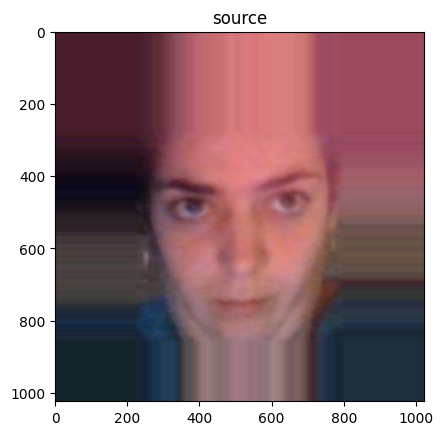

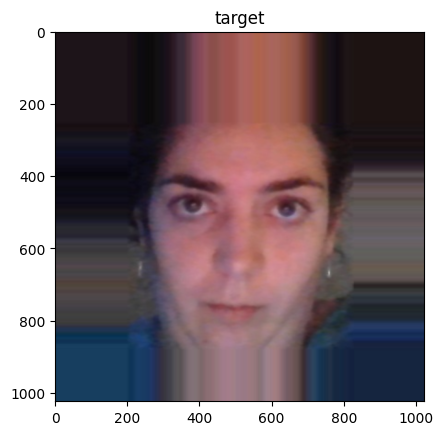

True

In [ ]:
from matplotlib import pyplot as plt
import cv2
from google.colab import files
import numpy as np

# Function to upload images in Colab
def upload_images():
    uploaded = files.upload()
    return uploaded

# Upload source and target images
uploaded_images = upload_images()

# Print the uploaded file names
print("Uploaded files:", list(uploaded_images.keys()))

# Update the file names based on the actual uploads
SOURCE_NAME = 'face_0.png'
TARGET_NAME = 'face_51.png'

image_source = cv2.imdecode(np.frombuffer(uploaded_images[SOURCE_NAME], np.uint8), cv2.IMREAD_COLOR)
if image_source is None:
    raise ValueError("Source image not found")

image_target = cv2.imdecode(np.frombuffer(uploaded_images[TARGET_NAME], np.uint8), cv2.IMREAD_COLOR)
if image_target is None:
    raise ValueError("Target image not found")

# Rest of your code
cropped_source = crop_stylegan(image_source)
cropped_target = crop_stylegan(image_target)

img = cv2.cvtColor(cropped_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('source')
plt.show()

img = cv2.cvtColor(cropped_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('target')
plt.show()

cv2.imwrite("cropped_source.png", cropped_source)
cv2.imwrite("cropped_target.png", cropped_target)

# Uncomment these lines if needed
# print(find_eyes(cropped_source))
# print(find_eyes(cropped_target))


In [ ]:
cmd = f"python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_source --target=cropped_source.png --network={NETWORK}"
!{cmd}

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.71 loss 24567.77
step    2/1000: dist 0.72 loss 27641.13
step    3/1000: dist 0.76 loss 27167.11
step    4/1000: dist 0.68 loss 26253.13
step    5/1000: dist 0.69 loss 24957.99
step    6/1000: dist 0.71 loss 23353.98
step    7/1000: dist 0.66 loss 21512.10
step    8/1000: dist 0.67 loss 19487.96
step    9/1000: dist 0.70 loss 17337.79
step   10/1000: dist 0.66 loss 15140.73
step   11/1000: dist 0.63 loss 12950.52
step   12/1000: dist 0.63 loss 10818.65
step   13/1000: dist 0.61 loss 8802.07
step   14/1000: dist 0.63 loss 6947.04
step   15/1000: dist 0.66 loss 5315.29
step   16/1000: dist 0.59 loss 3970.31
step   17/1000: dist 0.62 loss 2941.87
step   18/1000: dist 0.60 loss 2214.72
step   19/1000: dist 0

In [ ]:
cmd = f"python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_target --target=cropped_target.png --network={NETWORK}"
!{cmd}

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.67 loss 24567.73
step    2/1000: dist 0.67 loss 27641.08
step    3/1000: dist 0.72 loss 27167.07
step    4/1000: dist 0.62 loss 26253.07
step    5/1000: dist 0.64 loss 24957.94
step    6/1000: dist 0.66 loss 23353.93
step    7/1000: dist 0.62 loss 21512.07
step    8/1000: dist 0.63 loss 19487.92
step    9/1000: dist 0.65 loss 17337.74
step   10/1000: dist 0.61 loss 15140.70
step   11/1000: dist 0.64 loss 12950.52
step   12/1000: dist 0.59 loss 10818.56
step   13/1000: dist 0.58 loss 8802.04
step   14/1000: dist 0.59 loss 6946.97
step   15/1000: dist 0.62 loss 5315.25
step   16/1000: dist 0.57 loss 3970.28
step   17/1000: dist 0.56 loss 2941.81
step   18/1000: dist 0.59 loss 2214.70
step   19/1000: dist 0

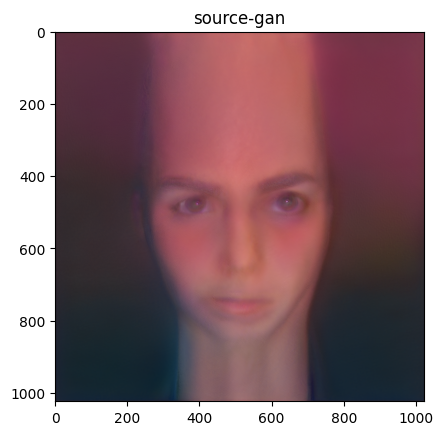

In [ ]:
img_gan_source = cv2.imread('/content/out_source/proj.png')
img = cv2.cvtColor(img_gan_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('source-gan')
plt.show()

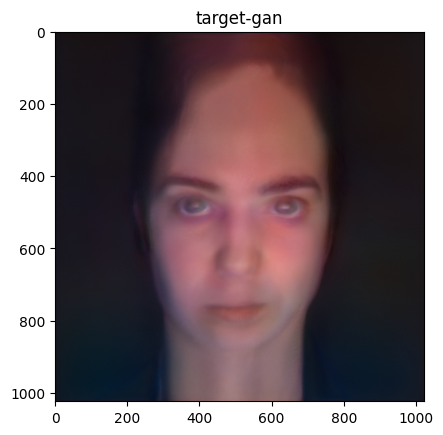

In [ ]:
img_gan_target = cv2.imread('/content/out_target/proj.png')
img = cv2.cvtColor(img_gan_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('target-gan')
plt.show()

In [ ]:
import torch
import dnnlib
import legacy
import PIL.Image
import numpy as np
import imageio
from tqdm.notebook import tqdm

lvec1 = np.load('/content/out_source/projected_w.npz')['w']
lvec2 = np.load('/content/out_target/projected_w.npz')['w']

network_pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as fp:
    G = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) # type: ignore

diff = lvec2 - lvec1
step = diff / STEPS
current = lvec1.copy()
target_uint8 = np.array([1024,1024,3], dtype=np.uint8)

video = imageio.get_writer('/content/movie.mp4', mode='I', fps=FPS, codec='libx264', bitrate='16M')

for j in tqdm(range(STEPS)):
  z = torch.from_numpy(current).to(device)
  synth_image = G.synthesis(z, noise_mode='const')
  synth_image = (synth_image + 1) * (255/2)
  synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

  repeat = FREEZE_STEPS if j==0 or j==(STEPS-1) else 1

  for i in range(repeat):
    video.append_data(synth_image)
  current = current + step


video.close()

  0%|          | 0/150 [00:00<?, ?it/s]

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


In [ ]:
from google.colab import files
files.download("movie.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>